In [3]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importing the data from a csv file to a DataFrame
df = pd.read_csv("netflix1.csv")
# Showing the first five values of the DataFrame
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
df.describe()


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#check for duplicates
df.duplicated().value_counts()


False    8790
dtype: int64

In [8]:
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


In [10]:
# Let's perform a basic visual analysis of the data.
# pd.set_option('display.max_rows', 220)
df.groupby('duration').count().sort_values(by='show_id',ascending=False)

,show_id,type,title,director,country,date_added,release_year,rating,listed_in
duration,,,,,,,,,
1 Season,1791,1791,1791,1791,1791,1791,1791,1791,1791
2 Seasons,421,421,421,421,421,421,421,421,421
3 Seasons,198,198,198,198,198,198,198,198,198
90 min,152,152,152,152,152,152,152,152,152
94 min,146,146,146,146,146,146,146,146,146
...,...,...,...,...,...,...,...,...,...
201 min,1,1,1,1,1,1,1,1,1
200 min,1,1,1,1,1,1,1,1,1
196 min,1,1,1,1,1,1,1,1,1


 Assessment & Categorising(problems identified with dataset)
- Quality issue
Variable 'date_added' has the wrong data type.
Variable 'duration' has the wrong data type.
-Tidiness issue
The 'listed_in' variable has several categories in a single observation.
There are two types of observations, TV shows and movies.

In [18]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [11]:
# Before cleaning, lets make a copy of the dataframe.
df_clean = df.copy()

In [12]:
#fixing variable date_added has wrong data type
df_clean.date_added = pd.to_datetime(df_clean.date_added)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [16]:
df_clean.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies


In [31]:
type_l = df_clean['type'].unique()
print(type_l)

['Movie' 'TV Show']


In [32]:
df_movie = df_clean[df_clean['type'] == type_l[0]]
df_tv_show = df_clean[df_clean['type'] == type_l[1]]

In [33]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [34]:
df_tv_show

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


In [36]:
temp_cat = df_clean.listed_in.str.split(',')

In [37]:
temp_cat

0                                         [Documentaries]
1       [Crime TV Shows,  International TV Shows,  TV ...
2                  [TV Dramas,  TV Horror,  TV Mysteries]
3                   [Children & Family Movies,  Comedies]
4       [Dramas,  Independent Movies,  International M...
                              ...                        
8785                 [International TV Shows,  TV Dramas]
8786                                           [Kids' TV]
8787    [International TV Shows,  Romantic TV Shows,  ...
8788                                           [Kids' TV]
8789                                           [Kids' TV]
Name: listed_in, Length: 8790, dtype: object

In [14]:
df_clean['listed_in1'] = 0
df_clean['listed_in2'] = 0
df_clean['listed_in3'] = 0
temp_cat = df_clean.listed_in.str.split(',')
i=0
for i in range (8790):
    t_cat = temp_cat[i]
    if len(t_cat) == 1:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = 0
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 2:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = 0
    if len(t_cat) == 3:
        df_clean['listed_in1'][i] = temp_cat[i][0]
        df_clean['listed_in2'][i] = temp_cat[i][1]
        df_clean['listed_in3'][i] = temp_cat[i][2]

C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_23704\2194665123.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in1'][i] = temp_cat[i][0]
C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_23704\2194665123.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['listed_in2'][i] = 0
C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_23704\2194665123.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['

In [17]:
df_clean


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",International TV Shows,TV Dramas,0
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Kids' TV,0,0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows,Romantic TV Shows,TV Dramas
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,Kids' TV,0,0


In [15]:
df_tv = df_clean[df_clean.type == 'TV Show']
df_movie = df_clean[df_clean.type == 'Movie']

There are two different types of observations in a single data set: TV Shows and Movies. The solution would be to split the dataset into two.

In [16]:
df_tv.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries


In [17]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals


In [18]:
temp_dur = df_tv.duration.str.split(' ',expand=True)
df_tv['duration_seasons'] = temp_dur[0]
df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)

C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_10780\1417954650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv['duration_seasons'] = temp_dur[0]
C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_10780\1417954650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv.duration_seasons = pd.to_numeric(df_tv.duration_seasons)


In [19]:
temp_dur = df_movie.duration.str.split(' ',expand=True)
df_movie['duration_minutes'] = temp_dur[0]
df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)

C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_10780\3991584291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie['duration_minutes'] = temp_dur[0]
C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_10780\3991584291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie.duration_minutes = pd.to_numeric(df_movie.duration_minutes)


In [20]:
df_tv.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_seasons
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows,International TV Shows,TV Action & Adventure,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas,TV Horror,TV Mysteries,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows,Reality TV,0,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries,Reality TV,0,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",British TV Shows,Crime TV Shows,Docuseries,1


In [21]:
df_movie.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87


Next step will be to store these dataframes into seperate csv files  

In [22]:
df_clean.to_csv('Netflix_DF_cleaned.csv')
df_tv.to_csv('Netflix_TV_cleaned.csv')
df_movie.to_csv('Netflix_Movie_cleaned.csv')

Analyzing and Visualizing data(Try to answer these following questions)


What type of media has Netflix produced the most?
Which country produced the most of Netflix's media?
What are the most popular genres for countries that produced media?n
What is the relationship between the year a media was made and when added to the Netflix platform?n
Has Netflix's media classification changed over time?
What are the most popular genres for Netflix media?
Has the length of TV seasons or Movie's length changed over time?

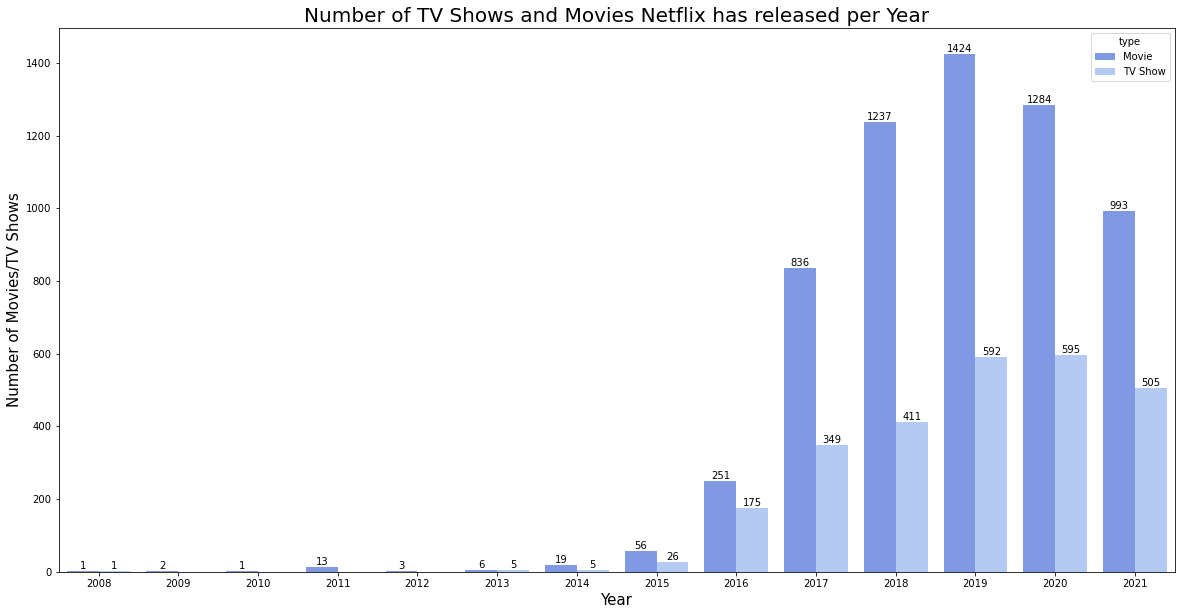

In [23]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
plt.figure(figsize=[20,10])
base_color = sns.color_palette('coolwarm',n_colors=5)
tv_movie = sns.countplot(x=df_clean.date_added.dt.year, data=df_clean, hue='type', palette = base_color)
tv_movie.set_title("Number of TV Shows and Movies Netflix has released per Year",fontsize = 20)
tv_movie.set_xlabel('Year',fontsize = 15)
tv_movie.set_ylabel('Number of Movies/TV Shows',fontsize = 15)
for container in tv_movie.containers:
    tv_movie.bar_label(container)

It seems like for both TV shows and Movies there has been a steady increase since the start of 2008; the only big drop happening in 2021 possibly due to the economic impact of COVID.

Before 2017, the number of TV Shows and Movies brought to the streaming service was on par. However, after 2017 the company started introducing more movies into the service more than doubling TV Shows in the amount of content.

In [24]:
#lets start with tv shows 
df_clean.date_added.dt.year.count()

8790

In [25]:
#Let's check how many countries have produced a TV Show for Netlix
len(df_tv.groupby('country').count().index)

59

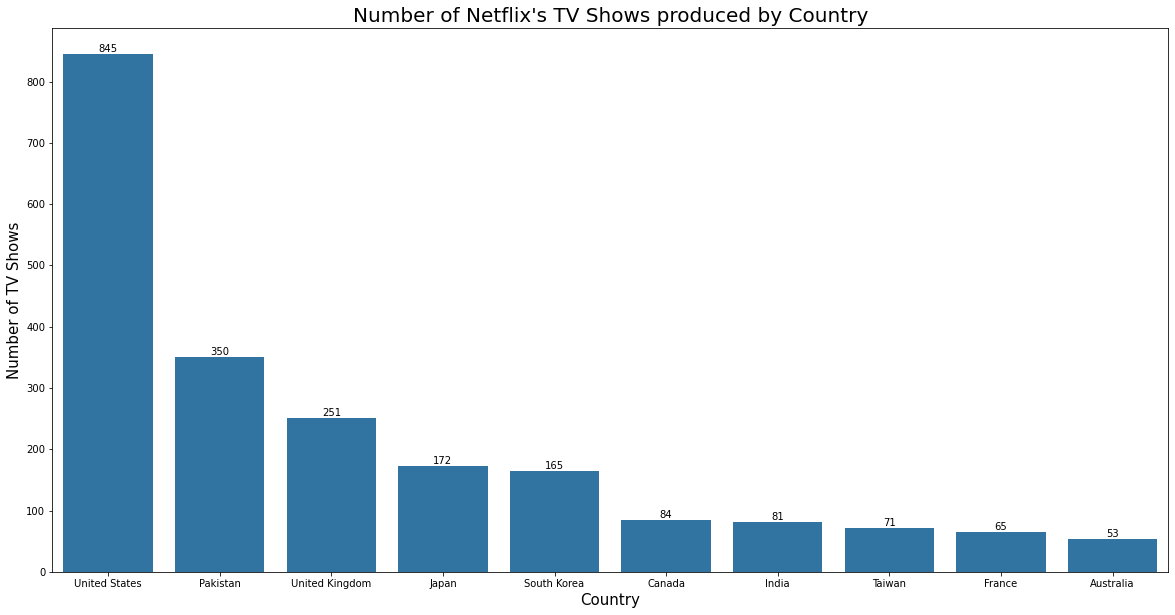

In [26]:
# Considering there are too many countries, we will limit our study to just the top 10 countries.
sort_order = df_tv.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_c = df_tv[df_tv['country'].isin(sort_order)]
base_color = base_color = sns.color_palette()[0]
plt.figure(figsize=[20,10])
tv_c = sns.countplot(x='country',data=df_tv_c,order=sort_order, color = base_color)
tv_c.set_title("Number of Netflix's TV Shows produced by Country",fontsize = 20)
tv_c.set_xlabel('Country',fontsize = 15)
tv_c.set_ylabel('Number of TV Shows',fontsize = 15)
for container in tv_c.containers:
    tv_c.bar_label(container)

It is not unexpected that most of the TV shows that are brought to the streaming service were produced in the USA. However, the country with the second most production would be Pakistan - which one would normally expect the second place to belong to another english speaking country or western.

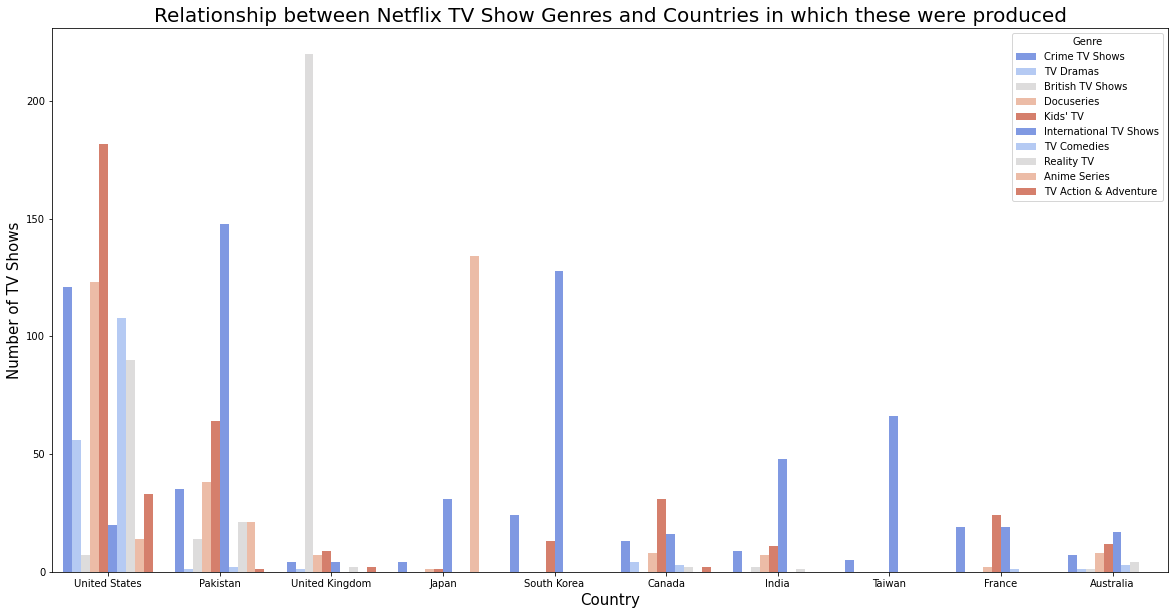

In [27]:
plt.figure(figsize=[20,10])
order1 = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv[df_tv['listed_in1'].isin(order1)]
order2 = df_tv_f.groupby('country').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_f = df_tv_f[df_tv_f['country'].isin(order2)]
base_color = sns.color_palette('coolwarm',n_colors=5)
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv_f,x='country',hue='listed_in1', palette=base_color, order=order2)
tv_g.set_xlabel('Country',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Netflix TV Show Genres and Countries in which these were produced",fontsize = 20)
plt.legend(title = 'Genre', loc = 'upper right')

The most popular TV genres overall seem to be Kid’s TV and International TV Shows. Considering that Netflix is an American company, it makes sense that shows produced outside of the US are considered ‘International TV Shows.

US has a big diversity of shows produced but most of them were TV Action & Adventure, followed by Docuseries and Crime TV Shows.

For Pakistan and South Korea, both the most produced genres were Kid’s TV and International TV Shows.

However, the UK and Japan have the biggest production of Reality TV shows and Anime series respectively.

C:\Users\Kriti Jain\AppData\Local\Temp\ipykernel_10780\396115598.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tv_f = df_tv[ry_f][da_f]


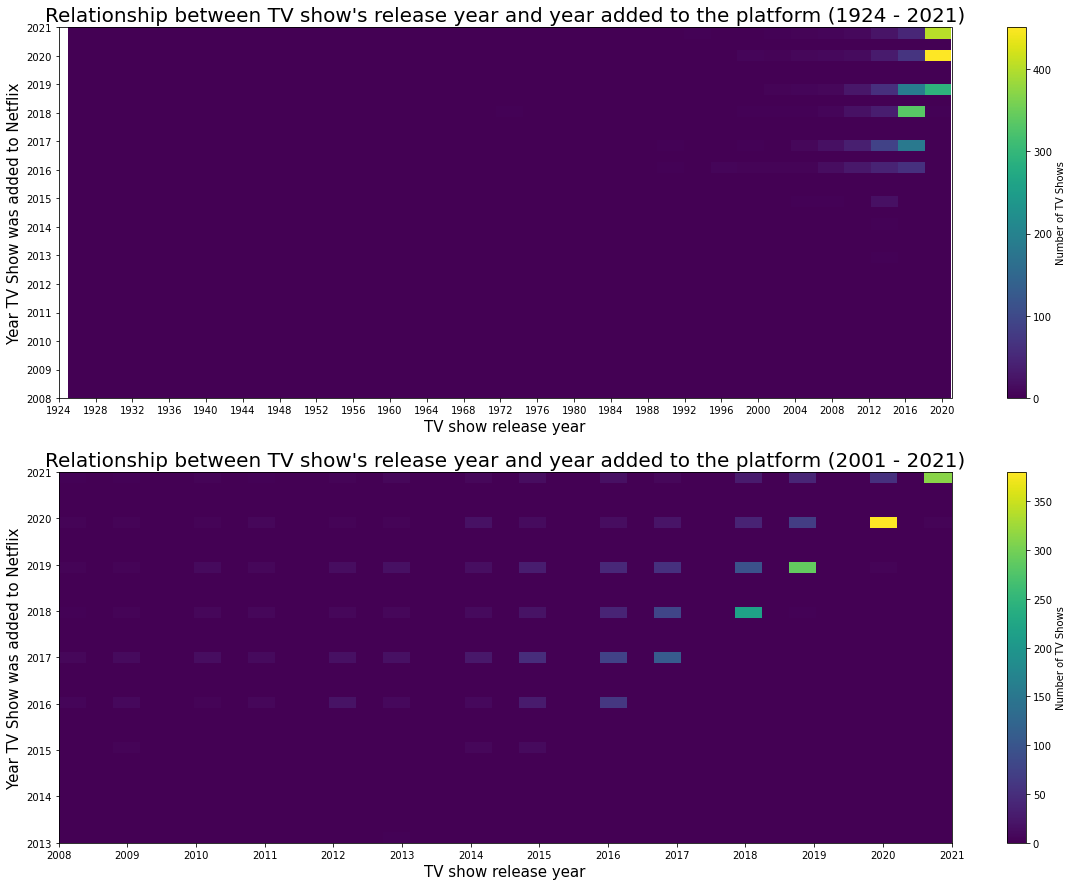

In [28]:
#In this section we would see the relationship between Netflix adding TV show to their catalog and their respective release date
plt.figure(figsize=[20,15])
bins=np.arange(1924,2025,4)
plt.subplot(2,1,1)
tv_rd = plt.hist2d(data=df_tv,x='release_year',y=df_tv.date_added.dt.year, bins=33)
plt.xticks(np.arange(1924,2022,4));
plt.yticks(np.arange(2008,2022,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (1924 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

plt.subplot(2,1,2)
ry_f = df_tv.release_year>2007
da_f = df_tv.date_added.dt.year>2008
df_tv_f = df_tv[ry_f][da_f]
tv_rd1 = plt.hist2d(data=df_tv_f,x='release_year',y=df_tv_f.date_added.dt.year, bins=33)
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(2013,2022,1));
plt.xlabel('TV show release year',fontsize = 15)
plt.ylabel('Year TV Show was added to Netflix',fontsize = 15)
plt.title("Relationship between TV show's release year and year added to the platform (2001 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of TV Shows')

Initially, Netflix would not bring recently produced TV shows into the service. It was up until 2016, in which the service started producing their own TV shows and bringing recently filmed TV shows into their streaming service.

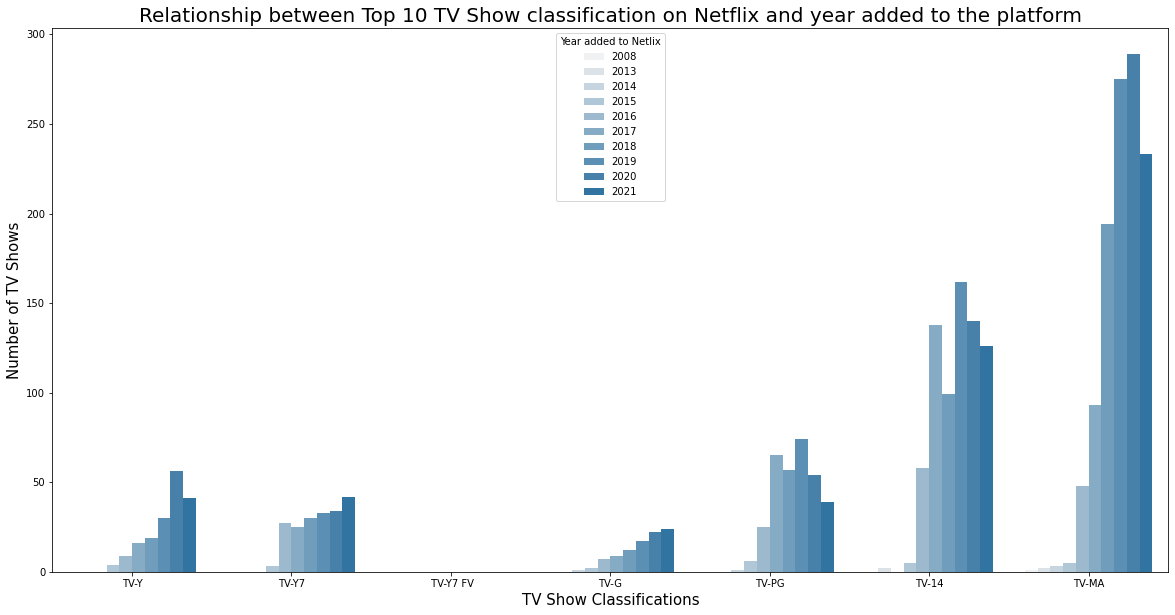

In [29]:
plt.figure(figsize=[20,10])
order = ['TV-Y', 'TV-Y7', ' TV-Y7 FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA']
base_color = base_color = sns.color_palette()[0]
a=df_tv.date_added.dt.year
tv_g = sns.countplot(data=df_tv,x='rating',hue=a, order=order, color=base_color)
tv_g.set_xlabel('TV Show Classifications',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show classification on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix',)

Most of Netflix's TV shows are categorised as TV-MA (primarily) and TV-14 (secondarily). TV-MA had been steadily increasing up until 2021; whilst in the other hand TV-14 has had a sporadic growth with a decrease starting from 2020 - This possible due to TV Shows pushing their classification to a more mature audience (TV-MA).

The only shows that had a steady increase with no drops whatsoever were the ones classified as TV-G and TV-Y7.

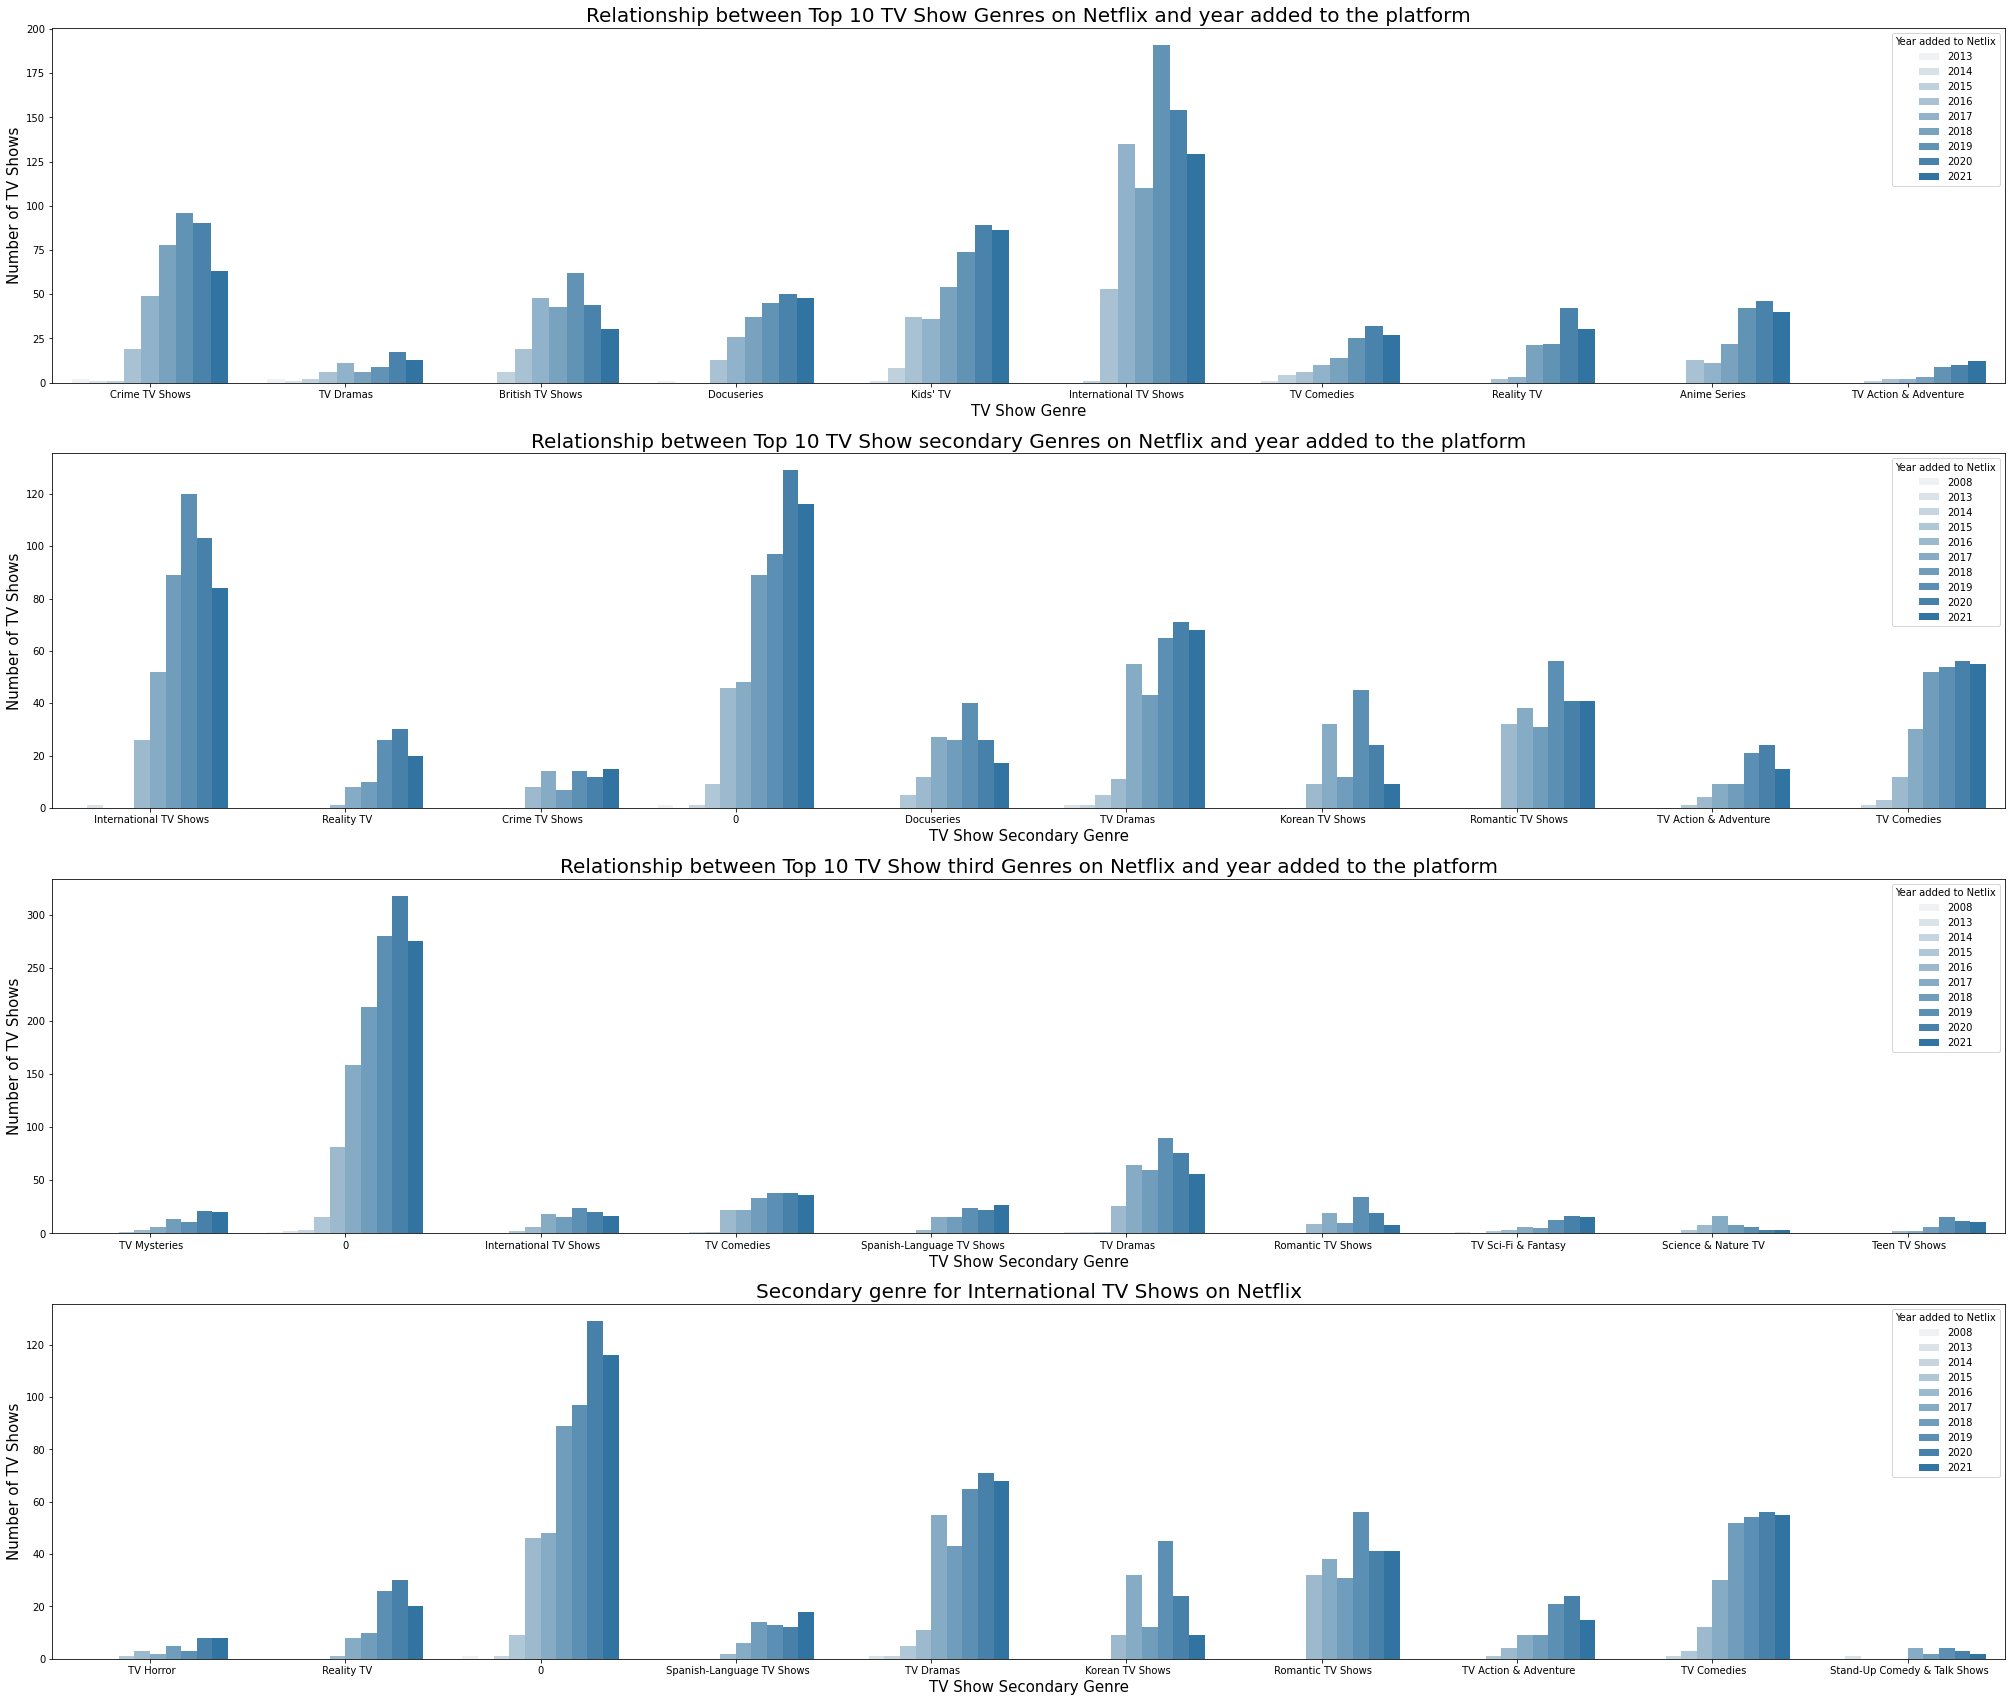

In [30]:
plt.figure(figsize=[35,30])
plt.subplot(4,1,1)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in1').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in1'].isin(sort_order)]
tv_g = sns.countplot(data=df_tv_g,x='listed_in1',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g.set_xlabel('TV Show Genre',fontsize = 15)
tv_g.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g.set_title("Relationship between Top 10 TV Show Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')


plt.subplot(4,1,2)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in2'].isin(sort_order)]
tv_g1 = sns.countplot(data=df_tv_g,x='listed_in2',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g1.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g1.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g1.set_title("Relationship between Top 10 TV Show secondary Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix')

plt.subplot(4,1,3)

base_color = base_color = sns.color_palette()[0]
sort_order = df_tv.groupby('listed_in3').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g = df_tv[df_tv['listed_in3'].isin(sort_order)]
tv_g3 = sns.countplot(data=df_tv_g,x='listed_in3',hue=df_tv_g.date_added.dt.year, color=base_color)
tv_g3.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g3.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g3.set_title("Relationship between Top 10 TV Show third Genres on Netflix and year added to the platform",fontsize = 20)
plt.legend(title = 'Year added to Netlix', loc='upper right')

plt.subplot(4,1,4)
df_tv_g1 = df_tv.listed_in1=='International TV Shows'
df_tv_g1 = df_tv[df_tv_g1]
base_color = base_color = sns.color_palette()[0]
sort_order = df_tv_g1.groupby('listed_in2').count().sort_values(by = 'show_id',ascending=False)[0:10].index
df_tv_g1 = df_tv[df_tv['listed_in2'].isin(sort_order)]
tv_g4 = sns.countplot(data=df_tv_g1,x='listed_in2',hue=df_tv_g1.date_added.dt.year, color=base_color)
tv_g4.set_xlabel('TV Show Secondary Genre',fontsize = 15)
tv_g4.set_ylabel('Number of TV Shows',fontsize = 15)
tv_g4.set_title("Secondary genre for International TV Shows on Netflix",fontsize = 20)
plt.legend(title = 'Year added to Netlix', loc='upper right')

For this analysis an assumption had to be made, the first category that appears on a TV show would be classified as the 'main' category, followed by the secondary and the third.

Most of the TV shows produced were International TV Shows followed by Crime shows and Kids TV.

For secondary genres, most of TV shows do not have a secondary genre . But the rest were mainly classified as International TV Shows, TV dramas and TV comedies.

For third genres, Most of TV shows do not have a third genre. But the rest were mainly classified as TV Dramas, TV comedies and Romantic TV shows.

Since International TV Shows is a broad genre, we also performed an analysis on the secondary genres for International TV Shows. The result was that most of them do not have a secondary genre. But the rest were mainly classified as TV Dramas, Romantic TV shows and TV comedies.

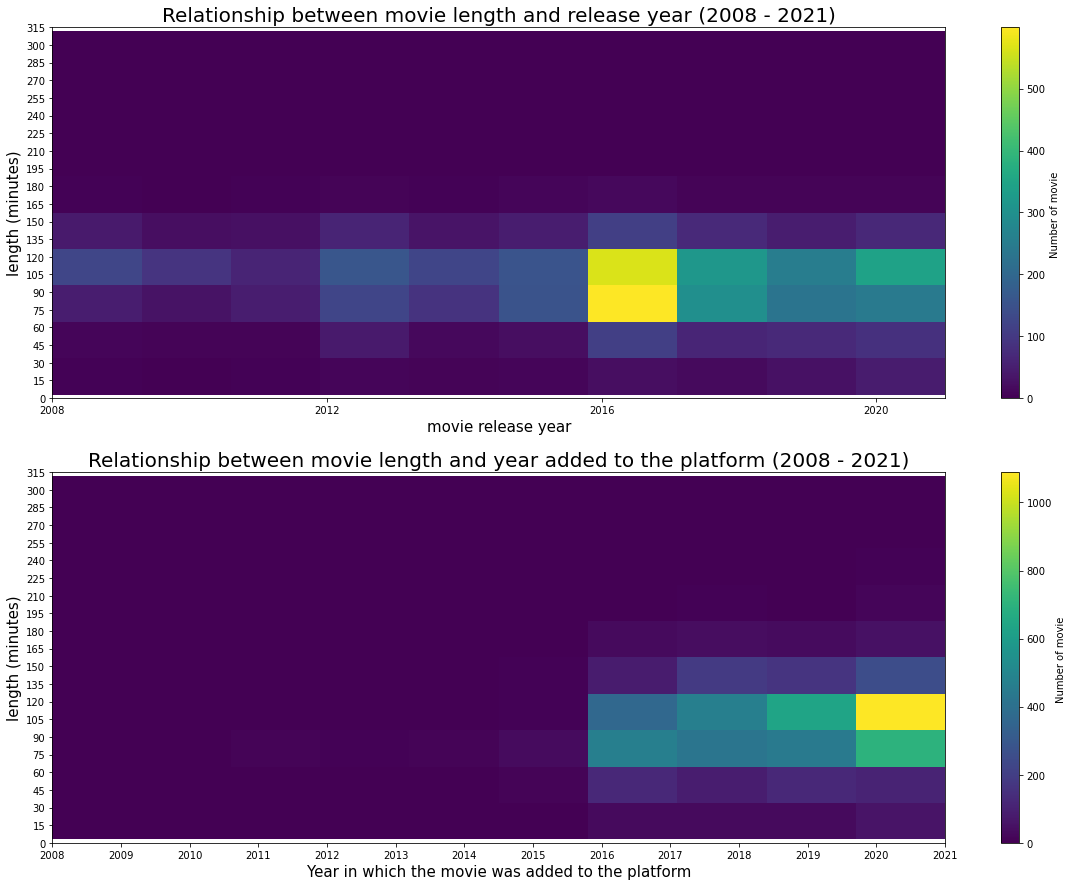

In [31]:
#In this section we would see the relationship between Netflix adding movie to their catalog and their respective release date
plt.figure(figsize=[20,15])
plt.subplot(2,1,1)
da_f = df_movie.release_year>2007
df_movie_f = df_movie[da_f]
movie_rd = plt.hist2d(data=df_movie_f,x='release_year',y='duration_minutes')
plt.xticks(np.arange(2008,2022,4));
plt.yticks(np.arange(0,316,15));
plt.xlabel('movie release year',fontsize = 15)
plt.ylabel('length (minutes)',fontsize = 15)
plt.title("Relationship between movie length and release year (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of movie ')

plt.subplot(2,1,2)
da_f = df_movie.date_added.dt.year>2007
df_movie_f = df_movie[da_f]
movie_rd1 = plt.hist2d(data=df_movie_f,x=df_movie_f.date_added.dt.year,y='duration_minutes')
plt.xticks(np.arange(2008,2022,1));
plt.yticks(np.arange(0,316,15));
plt.xlabel('Year in which the movie was added to the platform',fontsize = 15)
plt.ylabel('length (minutes)',fontsize = 15)
plt.title("Relationship between movie length and year added to the platform (2008 - 2021)",fontsize = 20)
plt.colorbar(label = 'Number of movie ')

For movies release year and length, most of the movie's length range between 70 and 120min, however overtime the length of the movies has decreased.

For movies length and year it was added to the platform, it follows a similar trend in which most of the movies last between 70 and 120min. However, it also seem like most of the movies seems to be gradually increasing in length

In [34]:
#now that we are done with basic data cleaning, analysis and visualization we can move on to implementing supervised machine learning techniques to this
#we shall start with linear regression for movies where we see if duration of movie and release have any correlation
movieregress = pd.read_csv("Netflix_movie_cleaned.csv")
movieregress.head()

,Unnamed: 0,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,listed_in1,listed_in2,listed_in3,duration_minutes
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Documentaries,0,0,90
1,3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Children & Family Movies,Comedies,0,91
2,4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas,Independent Movies,International Movies,125
3,6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",Comedies,Dramas,0,104
4,7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",Children & Family Movies,Comedies,Music & Musicals,87


In [35]:
movieregress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        6126 non-null   int64 
 1   show_id           6126 non-null   object
 2   type              6126 non-null   object
 3   title             6126 non-null   object
 4   director          6126 non-null   object
 5   country           6126 non-null   object
 6   date_added        6126 non-null   object
 7   release_year      6126 non-null   int64 
 8   rating            6126 non-null   object
 9   duration          6126 non-null   object
 10  listed_in         6126 non-null   object
 11  listed_in1        6126 non-null   object
 12  listed_in2        6126 non-null   object
 13  listed_in3        6126 non-null   object
 14  duration_minutes  6126 non-null   int64 
dtypes: int64(3), object(12)
memory usage: 718.0+ KB
